In [23]:
# import the dependencies
import cv2
import matplotlib.pyplot as plt

# load the files
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

#  load the model
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# empty list of python
classLabels = []
# loading the labels
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classlables.append(fpt.read())

# checking if the labels are loaded correctly or not
print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


[23]


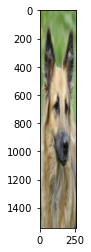

In [24]:
# we have to defend the input size 320/320 because our model only supports this format
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

# load the image
img = cv2.imread('dog3.jpg')

# show the image
# its in bgr format
plt.imshow(img)

# converting the image into RGB format
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# setting the threshold or accuracy you want we are just fixed for 50% confidence
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.6)

print(ClassIndex)


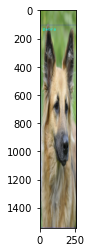

In [25]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex. flatten(), confidence.flatten(), bbox):
    # adding the box around the image and defining the color and width of the box
    cv2.rectangle(img, boxes, (255, 0, 0), 1)
    # adding the label in the box and defining the color,style and width of the font
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes [1]+40), font, fontScale=font_scale, color=(255, 255, 0), thickness=2 )

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [2]:
# import the dependencies
import cv2
import matplotlib.pyplot as plt

# load the files
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

#  load the model
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# empty list of python
classLabels = []
# loading the labels
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classlables.append(fpt.read())
# we have to define the input size 320/320 because our model only supports this format
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
cap = cv2.VideoCapture("Traffic IP Camera video.mp4") 
# Check if the video is playing correctly or not
if not cap. isOpened():
    cap = cv2. VideoCapture (0)
if not cap. isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2. FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex. flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes, (255, 0, 0), 2)
                cv2. putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes [1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3 )
    cv2.imshow('object Detection Tutorial', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3 1]
[3 3 3 1 1]
[3 3 3 1 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3]
[3 3 3]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3]
[3 3 3 1 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1 1]
[3 3 1 1 3 1]
[3 3 1 1 3]
[3 3 1 3 1 1]
[3 3 1 3]
[3 3 3 1 3]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3 3 8]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3 3 1]
[3 3 3 8 1]
[3 3 3 8]
[3 3 3 8]
[3 3 3 8]
[3 3 3 8]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3 8]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3

In [40]:
# import the dependencies
import cv2
import matplotlib.pyplot as plt

# load the files
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

#  load the model
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# empty list of python
classLabels = []
# loading the labels
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classlables.append(fpt.read())
# we have to define the input size 320/320 because our model only supports this format
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
cap = cv2.VideoCapture() 
# Check if the web cam is running correctly or not
if not cap. isOpened():
    cap = cv2. VideoCapture (0)
if not cap. isOpened():
    raise IOError("Cannot open web cam")

font_scale = 3
font = cv2. FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex. flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes, (255, 0, 0), 2)
                cv2. putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes [1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3 )
    cv2.imshow('object Detection Tutorial', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [2]:
import cv2
import numpy as np

config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model, config_file)

classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

cap = cv2.VideoCapture("videoplayback (13).mp4")  # Webcam capture

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Object dimensions (in meters)
object_width = 0.2  # Specify the actual width of the object in meters

focal_length = 0  # Initialize the focal length

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font,
                            fontScale=font_scale, color=(0, 255, 0), thickness=3)

                # Estimate distance
                object_center_x = (boxes[0] + boxes[2]) // 2
                object_center_y = (boxes[1] + boxes[3]) // 2

                if focal_length == 0:
                    focal_length = (object_width * cap.get(3)) / (2 * (boxes[2] - boxes[0]))

                # Calculate distance using the formula: distance = (object_width * focal_length) / (bounding_box_width)
                distance = (object_width * focal_length) / (boxes[2] - boxes[0])
                distance = round(distance, 2)  # Round to 2 decimal places

                # Display distance on the image
                cv2.putText(frame, f"Distance: {distance} meters", (10, 70), font, fontScale=2,
                            color=(0, 255, 0), thickness=2)

    cv2.imshow('Object Detection ', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()